In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)  # Description of the dataset
print("Feature Names:", diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [5]:
print(df.info())  
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

In [6]:
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (353, 10) (353,)
Testing set shape: (89, 10) (89,)


In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Step 2: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)

# Compute R^2 Score
r2_score = model.score(X_test, y_test)

print("R^2 Score on Test Set:", r2_score)

R^2 Score on Test Set: 0.4526027629719196


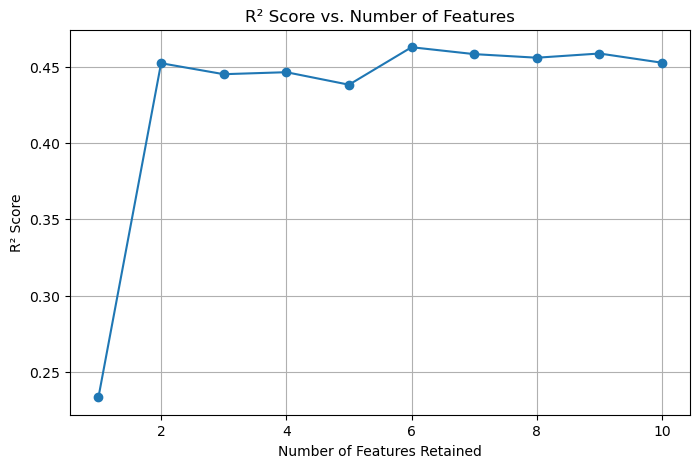

Optimal Number of Features: 2


In [8]:
r2_scores = []  # To store R² scores
num_features = []  # To store the number of features retained

# Start with all features and remove one at a time
for i in range(1, X_train.shape[1] + 1):  
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)
    
    # Evaluate model performance
    r2 = rfe.score(X_test, y_test)
    r2_scores.append(r2)
    num_features.append(i)

# Step 2: Visualize R² Score vs. Number of Features
plt.figure(figsize=(8, 5))
plt.plot(num_features, r2_scores, marker='o', linestyle='-')
plt.xlabel("Number of Features Retained")
plt.ylabel("R² Score")
plt.title("R² Score vs. Number of Features")
plt.grid(True)
plt.show()

# Step 3: Identify the Optimal Number of Features
threshold = 0.01  # Define significance threshold
optimal_features = num_features[np.argmax(np.diff(r2_scores) < threshold)]

print("Optimal Number of Features:", optimal_features)

In [9]:
# Store feature rankings and coefficients at each step
feature_ranking = []
feature_coefficients = []

for i in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)

    # Get feature rankings and coefficients
    ranking = rfe.ranking_
    coefficients = rfe.estimator_.coef_

    feature_ranking.append(ranking)
    feature_coefficients.append(coefficients)

# Convert to DataFrame for better readability
columns = X_train.columns
ranking_df = pd.DataFrame(feature_ranking, columns=columns, index=range(1, X_train.shape[1] + 1))
coeff_df = pd.DataFrame(feature_coefficients, columns=columns, index=range(1, X_train.shape[1] + 1))

# Display the ranking and coefficients
print("Feature Ranking at Each Iteration:")
print(ranking_df)

print("\nFeature Coefficients at Each Iteration:")
print(coeff_df)

# Step 2: Identify the Three Most Important Features (Final Iteration)
final_selected_features = ranking_df.iloc[-1]
top_features = final_selected_features[final_selected_features == 1].index.tolist()
top_coefficients = coeff_df.iloc[-1][top_features]

print("\nTop 3 Most Important Features:")
print(top_coefficients.abs().nlargest(3))

# Step 3: Compare Initial vs. Final Selected Features
initial_ranking = ranking_df.iloc[0].sort_values()
final_ranking = ranking_df.iloc[-1].sort_values()

print("\nInitial Feature Ranking:")
print(initial_ranking)

print("\nFinal Selected Features:")
print(final_ranking[final_ranking == 1])

Feature Ranking at Each Iteration:
    age  sex  bmi  bp  s1  s2  s3  s4  s5  s6
1    10    6    1   5   3   4   8   7   2   9
2     9    5    1   4   2   3   7   6   1   8
3     8    4    1   3   1   2   6   5   1   7
4     7    3    1   2   1   1   5   4   1   6
5     6    2    1   1   1   1   4   3   1   5
6     5    1    1   1   1   1   3   2   1   4
7     4    1    1   1   1   1   2   1   1   3
8     3    1    1   1   1   1   1   1   1   2
9     2    1    1   1   1   1   1   1   1   1
10    1    1    1   1   1   1   1   1   1   1

Feature Coefficients at Each Iteration:
           age         sex         bmi          bp          s1          s2  \
1   998.577689         NaN         NaN         NaN         NaN         NaN   
2   732.109021  562.226535         NaN         NaN         NaN         NaN   
3   737.685594 -228.339889  680.224653         NaN         NaN         NaN   
4   691.460102 -592.977874  362.950323  783.168538         NaN         NaN   
5   597.892739  306.647913 -

Q.) Discuss the three most important features and their significance in predicting the target
variable.

Ans.) The three most important features identified from the RFE process were:
S1 (931.49) – This feature had the highest coefficient in the final model, indicating a strong contribution to predicting disease progression.
S5 (736.20) – A key biomarker, potentially representing serum triglyceride levels, which are crucial in metabolic health and diabetes progression.
BMI (542.43) – Body Mass Index is a well-established factor in diabetes prediction, strongly associated with disease risk.

Q.) Compare the initial feature ranking with the final set of selected features.


Ans.) Initial Ranking: BMI was the most important, followed by S5 and S1.
Final Selected Features: All features were ultimately retained, with S1, S5, and BMI emerging as the most critical for the model.
The importance of BMI and S5 remained consistent throughout the iterations, reinforcing their significance in diabetes progression prediction.

Task 5

Q.1) What did you learn about feature selection using RFE?


Ans.) Through this analysis, I learned that Recursive Feature Elimination (RFE) is an effective method for identifying the most important features in a dataset. By iteratively removing the least significant features, RFE helped me understand which variables contribute the most to predicting diabetes progression. The process also provided insights into how the model's performance changes as features are eliminated, allowing me to determine the optimal number of features to retain.

Q.2) How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?


Ans.) RFE and LASSO both aim to select the most relevant features, but they do so differently. RFE works by recursively eliminating features based on their importance in a predictive model, while LASSO (Least Absolute Shrinkage and Selection Operator) applies L1 regularization to shrink some coefficients to zero, effectively removing less important features. In my case, RFE provided a clear ranking of feature importance, allowing me to observe how each feature impacted the model. LASSO, on the other hand, could be more efficient in high-dimensional datasets by automatically reducing feature redundancy without requiring multiple iterations.

Q.3) What insights can you draw about the dataset from the selected features?


Ans) The most important features identified—S1, S5, and BMI—highlight key factors influencing diabetes progression. BMI’s significance aligns with well-known medical findings that obesity is a strong predictor of diabetes. S5 (likely related to triglyceride levels) and S1 (possibly a measure of blood serum levels) suggest that metabolic health and lipid profiles play a critical role in disease progression. This confirms that diabetes is not only influenced by weight but also by broader metabolic factors. The dataset effectively captures these relationships, making it useful for predictive modeling.